# Initial ML

Aim to get as many initial ML models applied to the dataset using CDM and ML practical code.
Can then go and refine these models later, just want to get them made.  
ML coursework and practicals very useful, need to go and apply this to my dataset though.   
Have added in the code from the 


In [3]:
import os
import pandas as pd
import matplotlib as plt
os.chdir('../Data') 
toycomp = pd.read_csv('Combined_TOYCOMP_BNF_NHS_data.csv') # Using the BNF version of the dataframe
def rename_unname(df):
    for col in df:
        if col.startswith('Unnamed'):
            df.drop(col,axis=1, inplace=True)
rename_unname(toycomp)

Using toy comp bnf dataset as is currently thebest formatted one, and can get the main doc on the HPC into this format by running the other notebooks.

## Correlation matrix

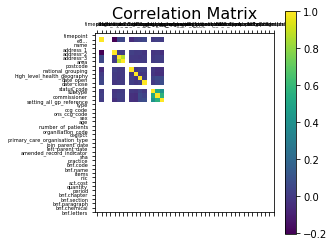

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
diag = plt.matshow(toycomp.corr())
plt.colorbar(orientation = 'vertical')
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(range(len(toycomp.columns)), toycomp.columns, fontsize=5)
plt.yticks(range(len(toycomp.columns)), toycomp.columns, fontsize=5)
plt.show()

## Training/test split

In [ ]:
X = data.iloc[:, :13] # The input columns
y = data.iloc[:, 13] # Define the outcome column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression() #Labelling thefeature
linearRegressor.fit(X_train, y_train) # Training the model
y_pred = linearRegressor.predict(X_train) # Saving the predicted values of y for each X value

In [ ]:
plt.scatter(y_train, y_pred)
plt.title('Comparing training data point and the predicted value')
plt.xlabel('Actual y value')
plt.ylabel('Predicted y value')
plt.show()

In [9]:
#Evaluating this model using mean squared error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
#Training
print(np.sqrt(mean_squared_error(y_train, y_pred))) #RMSE training set
print(r2_score(y_train, y_pred)) #R2 training
#Test
y_predtest = linearRegressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_predtest))) #RMSE test
print(r2_score(y_test, y_predtest)) #R2 test

NameError: name 'np' is not defined

In [ ]:
# Alternative classisification using least squares, from ML practical 1

# Create all possible combinations of attributes. 
# Itertools is a great python library that lets you deal with iterables in efficient ways. 
from itertools import chain, combinations
def all_combinations(attributes):
    """Create all possible combinations when given the attributes"""
    return chain(*map(lambda i: combinations(attributes, i), range(1, len(attributes)+1)))

_attributes = [name for name in column_names if name != 'class']
attribute_combinations = all_combinations(_attributes) #Note that this is an iterable object. 

# Function that takes in a list of attributes, and outputs predictions after carrying out least squares
def return_predictions(attributes, training_data=training_data, testing_data=test_data):    

    X = training_data[attributes].values.reshape(-1, len(attributes))
    _ = np.tile(np.array([1]), [X.shape[0]]).reshape(-1,1)
    X = np.append(_, X, axis=1)
    
    Y = training_data["output"].values.reshape(-1, 1)
    
    X_test = test_data[attributes].values.reshape(-1, len(attributes))
    _ = np.tile(np.array([1]), [X_test.shape[0]]).reshape(-1,1)
    X_test = np.append(_, X_test, axis=1)
    
    # Least squares solution
    W_opt = np.linalg.solve(np.matmul(X.T, X), np.matmul(X.T, Y))

    predictions = np.matmul(X_test, W_opt)
    
    return predictions

# Function that takes in a predictions vector, and outputs the mean squared error.
def return_mse(predictions, testing_data=test_data):
    Y_test = test_data["output"].values.reshape(-1, 1)
    
    error = Y_test - predictions

    square_error = np.square(error)
    
    mse = np.mean(square_error)
    
    return mse

# evaluate
attribute_combinations = all_combinations(_attributes)
for attributes in attribute_combinations:
    preds = return_predictions(list(attributes))
    print(f"{str(attributes):<70} MSE: {return_mse(preds)}")
    attribute_combinations = all_combinations(_attributes)

for attributes in attribute_combinations:
    preds = return_predictions(list(attributes))
    print(f"{str(attributes):<70} MSE: {return_mse(preds)}")

print(*attribute_combinations)
    

## PCA

In [ ]:
from sklearn import neighbours

knn = neighbors.KNeighborsClassifier() # Name the knn fitter
knn.fit(X_train, y_train) # Fitting the model
y_pred = knn.predict(X_test) # Creating the predictions for the first 100 rows test set
accuracy = np.sum(y_pred == y_test) / len(y_pred) # Comparing to truth to work out accuracy of model
idx_wrong = np.nonzero(y_pred != y_test[:100]) # Creating a group of all the ones that were classified wrong
print('Accuracy = {0:.1f}%.'.format(accuracy * 100)) #Print out
# Can then print out and look at the ones that were classified wrongly

## Scaling variables

In [ ]:
# Scaling the X_train data
scaler = StandardScaler() #Only need to scale the train, then apply to the test data
scaled_X_train = scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)

# Don't then need to scale the test data, as the model has been fitted
    #Check this!!!
    
#Apply the PCA model created earlier to the x_test
X_test2 = pca.transform(X_test) #Need to do the same idea to training data
X_test2_2d = pd.DataFrame(X_test2) # Create a pandas dataframe
X_test2_2d.columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5']
X_test2_2d.head()

#Therefore my new data set is called data_df_2d
#This looks like a good website if I don't want to use PCA: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

## Random forest

## SVM

This is large code file copy paste from the ML SVM practical

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# use seaborn plotting defaults
import seaborn as sns; sns.set()

from sklearn.datasets.samples_generator import make_blobs

# consider two classes of points which are well separated
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.50)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

# Task 1: Attempt to use linear regression to separate this data using linear regression.
# Note there are several possibilities which separate the data?     
# What happens to the classification of point [0.6, 2.1] (or similar)?

xfit = np.linspace(-1, 3.5) # Create a linear space?
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # Scatter plot

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]: 
    plt.plot(xfit, m * xfit + b, '-k')
    
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)    

plt.xlim(-1, 3.5)

plt.show()

# With SVM rather than simply drawing a zero-width line between the 
# classes, we draw a margin of some width around each line, up to the nearest point. 

# Task 2: Draw the margin around the lines you chose in Task 1.

#%%Cell

# For SVM the line that maximises the margin is the optimal model

# Task 3: Use the sklearn package to build a support vector classifier using a linear kernel
# (hint: you will need from sklearn.svm import SVC). Plot the decision fuction on the data

from sklearn.svm import SVC # "Support vector classifier"

def plot_svc_decision_function(model, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    X, Y = np.meshgrid(x,y)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    

    ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

model = SVC(kernel='linear', C=1E10, gamma = 0.1)
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()

#%% 

# Task 4: Change the number of points in the dataset using X = X[:N] and y = y[:N]
# and build the classifier again using a linear kernel
# Plot the decision function. Do you see any differences?

def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.50)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10, gamma = 0.1)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))
plt.show()
    
## So far we have considered linear boundaries but this is not always the case

## Consider the new dataset
    
from sklearn.datasets.samples_generator import make_circles
X2, y2 = make_circles(100, factor=.1, noise=.1)

#Task 5: Build a classifier using a linear kernel and plot the decision making function

clf = SVC(kernel='linear', gamma = 0.1).fit(X2, y2)

plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.show()

# These results should look wrong so we will try something else

# Consider projecting our data into a 3D plane
r = np.exp(-(X2 ** 2).sum(1))

from mpl_toolkits import mplot3d

ax = plt.subplot(projection='3d')
ax.scatter3D(X2[:, 0], X2[:, 1], r, c=y2, s=50, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

plt.show()

# Looking at the data it is now clear to see that we could draw a linear plane through
# it in the 3D space and classify the data. We can then project back to the 2D
# space. This is what the 'rbf' kernel does.

#Task 6: Try building a classifier using the 'rbf' kernel
clf = SVC(kernel='rbf', C=1E6, gamma = 0.1)
clf.fit(X2, y2)


plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')
plt.show()


# Task 7: Go back to your original dataset (ie. make blobs) and try using different kernels 
# to build the classifier and plot the results
# Compare the differences between the models

for ker in ['linear', 'poly', 'rbf']:
    model = SVC(kernel = ker, C=1E10, gamma = 0.1)
    model.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model)
    plt.show()

## So far we have looked at clearly delineated data. Consider the following dataset
## where the margins are less clear

X3, y3 = make_circles(n_samples=100, factor=0.2, noise = 0.35)
plt.scatter(X3[:, 0], X3[:, 1], c=y3, s=50, cmap='autumn')
plt.show()

## SVM has a tuning parameter C which softerns the margins. For very large C, 
## the margin is hard, and points cannot lie in it. For smaller $C$, the margin 
# is softer, and can grow to encompass some points.

# Task 8: Try experimenting with different values of C and see what different
# results you get

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='rbf', C=C, gamma = 0.1).fit(X3, y3)
    axi.scatter(X3[:, 0], X3[:, 1], c=y3, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.set_title('C = {0:.1f}'.format(C), size=14)

plt.show()    
    
# Task 9: Use GridSearchCV (hint: from sklearn.model_selection import GridSearchCV)
# to find the optimum parameters for C. 

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 5, 10, 100], 'gamma': [0.01, 0.1, 0.3, 0.5]}

model = SVC(kernel='rbf', C=1, gamma = 0.1).fit(X3, y3)

grid = GridSearchCV(model, param_grid)

grid.fit(X3, y3)
print(grid.best_params_)

model = grid.best_estimator_


plt.scatter(X3[:, 0], X3[:, 1], c=y3, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()

## Decision trees

In [ ]:
# preamble
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

import graphviz 

# Helper function to plot the decision tree. This uses the graphviz library.
def plot_tree(graph, feature_names=None, class_names=None):
    '''
    This method takes a DecisionTreeClassifier object, along with a list of feature names and target names
    and plots a tree. The feature names and class names can be left empty; they are just there for labelling 
    '''
    dot_data = export_graphviz(graph, out_file=None, 
                      feature_names=feature_names,  
                      class_names=class_names,  
                      filled=True, rounded=True,  
                      special_characters=True) 
    
    graph = graphviz.Source(dot_data)
    
    return graph
# B1) We initialise the DecisionTreeClassifier object. 
    # We can set our hyperparameters here if necessary; we'll look into this in a bit.
base_model = DecisionTreeClassifier() #criterion='entropy' in the brackets if you want to use the entropy criteria

# B2) DecisionTreeClassifier has a fit method, 
    # which takes the train X and train y to learn a tree. The necessary optimisation is done here. 
fitted_base_model = base_model.fit(iris_X, iris_y)

# B3) Use the helper function defined above to plot the learned model.
plot_tree(fitted_base_model, iris.feature_names, iris.target_names)


Note that as per the [documentation](https://scikit-learn.org/stable/modules/tree.html), DecisionTreeClassfier implements a modified version of CART. You can look at documentation for details about the particular algorithm scikit-learn implements. 

Since it implements CART, by default, DecisionTreeClassifier uses the Gini Index to measure the leaf impurity. You can also use the entropy information gain by setting `criterion='entropy'` when initialising the object. 

Other options available can be seen [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). A key option is the `max_depth`. This defines the maximum depth of the tree. If this isn't set, as above, the algorithm will continue until all leaves are pure, or until all leaves contain less than `min_samples_split` samples; this is another setting we can set. 

In other words, `max_depth` reduces the depth of the full tree seen above until the longest path in the tree is equal to `max_depth`. Pruning simplifies the model and makes it more interpretable to humans, and also prevents overfitting. 

Lets look at how the `max_depth` affects the accuracy of the model. 

In [ ]:
# Create a test-train data split. 
from sklearn.model_selection import train_test_split

# We have set the random seed to be 2, by setting the random_state parameter. 
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.3, random_state=2) # 30% is test data

# Initialise a new model that uses the default `max_depth`. The code pattern is the same as above.
base_model = DecisionTreeClassifier() #The maximum depth of the tree. 
    # default = None
    # None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
fitted_base_model = base_model.fit(iris_X, iris_y)
plot_tree(fitted_base_model, iris.feature_names, iris.target_names)


In [ ]:
### Fill in the blanks below.
#Choosing the hyperparameters by guesswork
# B4) Create a DecisionTreeclassifier object with the correct hyperparameters. This is your model.
    # Tim suggests doing this through cross validation
model_2 = DecisionTreeClassifier(max_depth=6, max_features=3)

# B5) Use the DecisionTreeclassifier.fit(X, y) function to optimise the model.
model_2_fitted = model_2.fit(X_train, y_train)
plot_tree(model_2_fitted, iris.feature_names, iris.target_names)

# B6) Use the DecisionTreeclassifier.predict(X) to make predictions
model_2_y_pred = model_2.predict(X_test)

# B7) Use metrics.accuracy_score(y_test, y_predictions) to compute accuracy scores. Print it.
full_model_accuracy =  metrics.accuracy_score(y_test, model_2_y_pred)
print(f'Accuracy: {full_model_accuracy}')

# B8) Plot the tree using plot_tree(model, feature_names, class_names)
plot_tree(model_2_fitted, iris.feature_names, iris.target_names)

In [ ]:
# Initialise another model that sets `max_depth=3`. The code pattern is the same as above.

# B4)
small_model = DecisionTreeClassifier(max_depth=3)
# B5)
small_model = model_2.fit(iris_X, iris_y)

# B7)
small_model_accuracy = metrics.accuracy_score(y_test, model_2_y_pred)
print(f'Accuracy: {small_model_accuracy}')
# B6)
plot_tree(small_model, iris.feature_names, iris.target_names)

We can see here that our accuracy has improved, albeit slightly.
Note however, that this is dependent on the random seed that we used (since we only ran this once).
You can try changing the random_state parameter above when we used the train_test_split function, and see if the result above changes.

We can now do a more extensive search by doing a grid search to search over several `max_depth` values.

In [ ]:
# Try using the GridSearchCV from sklearn.model_selection. 
# You can specify the set of `max_depth`s that you want to try by setting `param_grid={'max_depth':[1, 2, 3, 4, 5, 6]}`.
# Documentation can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

from sklearn.model_selection import GridSearchCV

# The code pattern here is similar to the previous sections. 
# G1) Initiate a GridSearchCV object with the correct model, param_grid, and cv; `cv=k` does a k-fold cross-validation.
grid_search_model = GridSearchCV(DecisionTreeClassifier(random_state=2), {'max_depth':[1, 2, 3, 4, 5, 6]}, cv=15,)

# G2) use the GridSearchCV.fit(X, y) method to run the grid search with cv. 
fitted_grid_search_model = grid_search_model.fit(iris_X, iris_y)

In [ ]:
# Print the mean accuracy scores. 
# The fitted GridSearchCV object has an attribute model.cv_results_ (note the underscore) that gives us a dict object with several results from the cross-valiation. 
# In particular, one of the key value pairs avaiable is 'mean_test_score', which returns the average score for each parameter value over the cv fold. 

accuracy_scores = fitted_grid_search_model.cv_results_['mean_test_score']
print(f"Mean accurary scores:{accuracy_scores}")

# Plot the best estimator you found
# GridSearchCV.best_estimator_ (again, the underscore) returns the model that performed the best. This behaves the same as the model objects from before, so we can plot it.
# G3) Get the best model
best_tree_model = fitted_grid_search_model.best_estimator_

# G4) Plot the best model
plot_tree(best_tree_model, iris.feature_names, iris.target_names)